## <font color='r'> Regression Model to PREDICT CO2 Emissions for Cars </font>

#### Import  Libraries

In [1]:
# For Data operations
import numpy as np
import pandas as pd

# For Viz's
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For removing warnings (if any)
import warnings
warnings.filterwarnings('ignore')

# For basic statistics
from scipy import stats

# For Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Read the data set

In [2]:
co2data = pd.read_csv("FuelConsumption.csv",index_col='MODELYEAR')

In [3]:
co2data.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,,,,,,,,,,,,
2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Describe the data to check quick stats

In [4]:
co2data.describe(include='all')

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,FORD,F150 FFV 4X4,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


#### Looking at the data above the key features can be determined 
#### 1) Categorical Variable and 2) Continous Variables
#### Categorical Variables : Make, Vehicle Class , Cylinders, Transmission,  FuelType  (Make, Vehicle Class and Transmission will still need to analysed if these are required for regression analysis)
#### Continous numerical variables : EngineSize, Fuel Consumption (City, Highway and Combined)

In [52]:
#co2data.MAKE.value_counts()  
## Quick look at MAKE variable. This doesn't sound a good variable for regression analysis

1.4

In [6]:
co2data.VEHICLECLASS.value_counts()  
## This could be potential variable.  Perhaps, we can group the data by Mid Size, Large Size etc

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

In [7]:
co2data.CYLINDERS.value_counts() ## Potential variable 

4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64

In [8]:
#co2data.TRANSMISSION.value_counts() 
## Not a potential variable

In [9]:
co2data.FUELTYPE.value_counts()  ## Potential variable

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

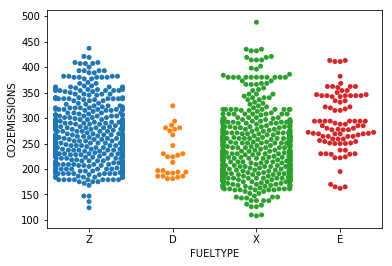

In [10]:
sns.swarmplot(x='FUELTYPE',y='CO2EMISSIONS',data=co2data)

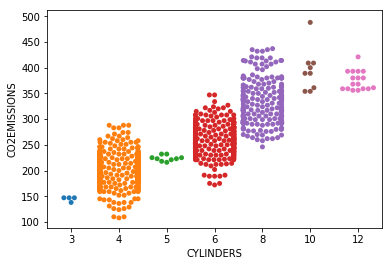

In [11]:
sns.swarmplot(x='CYLINDERS',y='CO2EMISSIONS',data=co2data)

### Quick look at box plots to confirm IQR for Catergorical variables

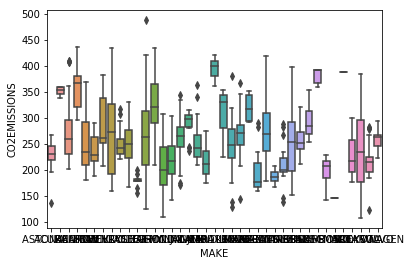

In [12]:
sns.boxplot(x='MAKE',y='CO2EMISSIONS',data=co2data)

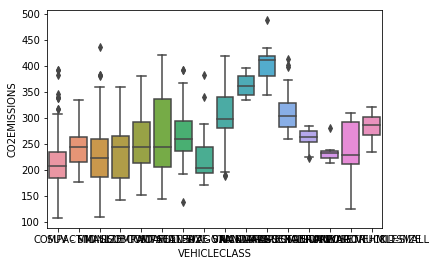

In [13]:
sns.boxplot(x='VEHICLECLASS',y='CO2EMISSIONS',data=co2data)

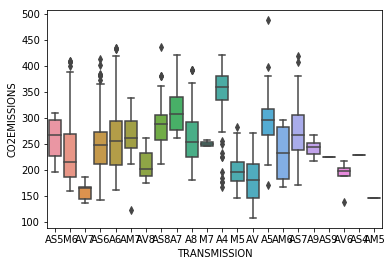

In [14]:
sns.boxplot(x='TRANSMISSION',y='CO2EMISSIONS',data=co2data)

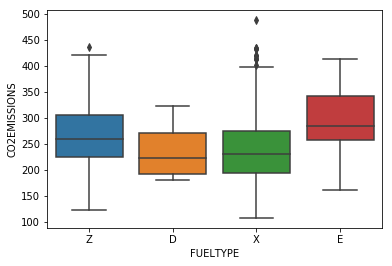

In [15]:
sns.boxplot(x='FUELTYPE',y='CO2EMISSIONS',data=co2data)

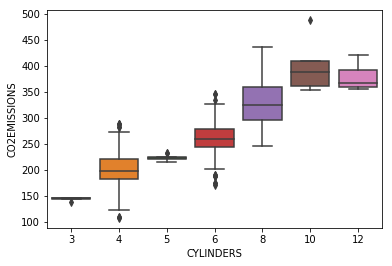

In [16]:
sns.boxplot(x='CYLINDERS',y='CO2EMISSIONS',data=co2data)

#### For cylinders there is no overlap on the IQR , hence this is potential variable that can be used. Remaining all are pretty much overalpping. There won't be a big difference if we add rest of tge varaibles for analysis

#### Looking at value counts , we can determine the categorical variables along with numerical cont variables that are requred
#### CAT VARIABLES > CYLINDERS, FUELTYPE
####  NUM CONT VARIABLES > ENGINESIZE, FUEL_CONSUMPTION_COMB
#### All the variables above are independent variabled that can be used to predict CO2 Emissions of the given car

** Because of large set of data points <b>FuelType</b> will add value in the anaylsis

### Subsetting the data frame

In [17]:
df = co2data[['FUELTYPE','CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [18]:
def categorise(a):
    if a == 'Z':
        return 1
    elif a == 'D':
        return 2
    elif a == 'X':
        return 3
    else:
        return 4

In [19]:
df['FUELTYPE_CAT'] = df['FUELTYPE'].apply(lambda x : categorise(x))

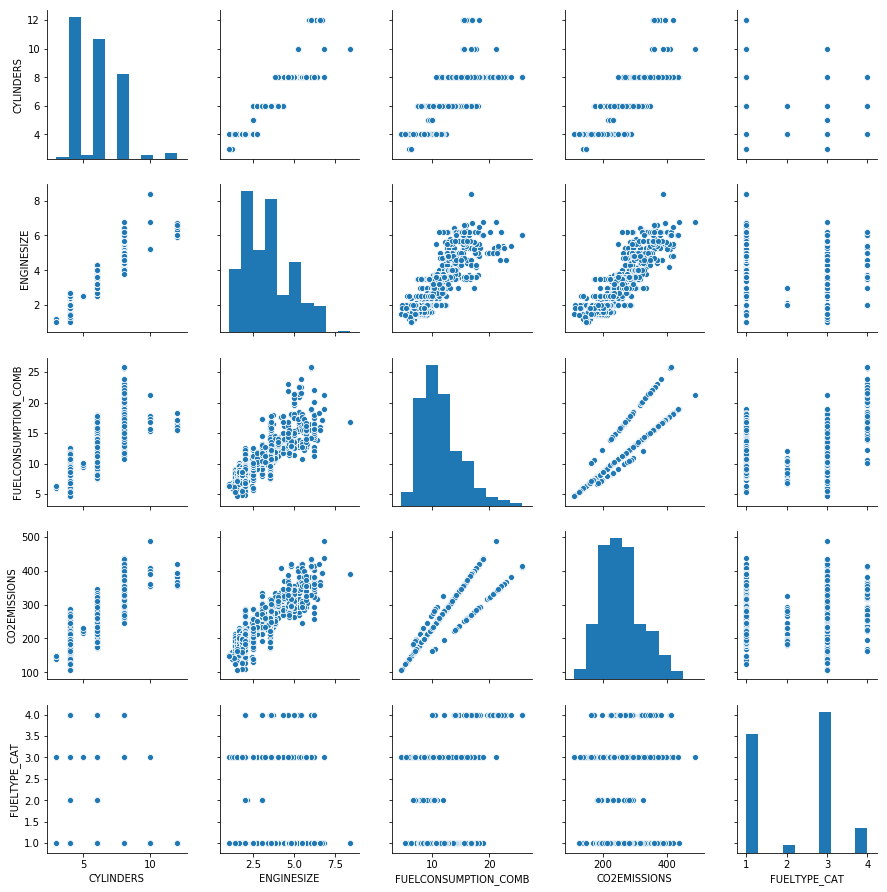

In [20]:
sns.pairplot(df)

#### Converting the fuel types to numerical categorical variabled

In [21]:
df.corr()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELTYPE_CAT
CYLINDERS,1.000000,0.934011,0.776788,0.849685,-0.171923
ENGINESIZE,0.934011,1.000000,0.819482,0.874154,-0.075066
FUELCONSUMPTION_COMB,0.776788,0.819482,1.000000,0.892129,0.151901
CO2EMISSIONS,0.849685,0.874154,0.892129,1.000000,-0.091596
FUELTYPE_CAT,-0.171923,-0.075066,0.151901,-0.091596,1.000000


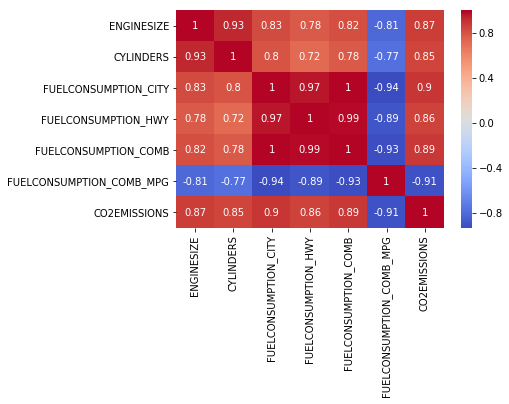

In [22]:
sns.heatmap(co2data.corr(),annot=True,cmap='coolwarm')

#### Try looking at LM plots with HUE as Cylinders given that its a good categorical variable and would help further regression analysis

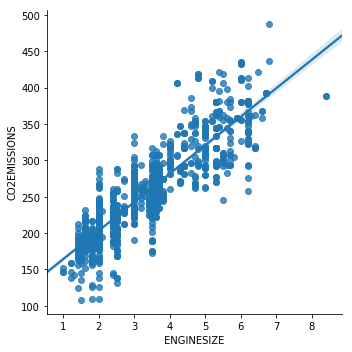

In [23]:
sns.lmplot('ENGINESIZE','CO2EMISSIONS',df)

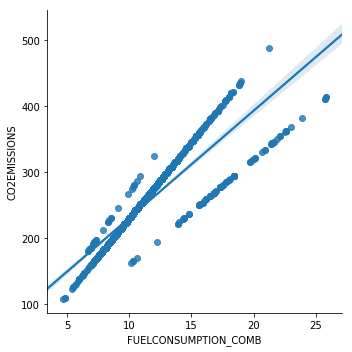

In [24]:
sns.lmplot('FUELCONSUMPTION_COMB','CO2EMISSIONS',df)

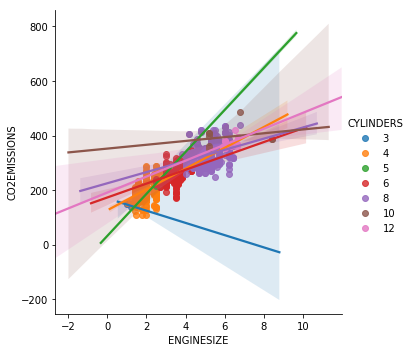

In [25]:
sns.lmplot('ENGINESIZE','CO2EMISSIONS',hue='CYLINDERS',data=df)

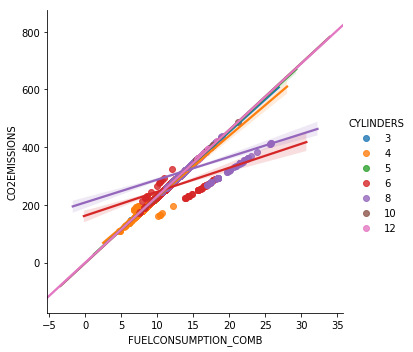

In [26]:
sns.lmplot('FUELCONSUMPTION_COMB','CO2EMISSIONS',hue='CYLINDERS',data=df)

#### A healthy correlation was noted on above graphs.  There is spread noted when Cylinder is added to the LMPLOT.  Given that Cylinder is impact the regression we should consider this for better prediction

#### A quick look at residual plots

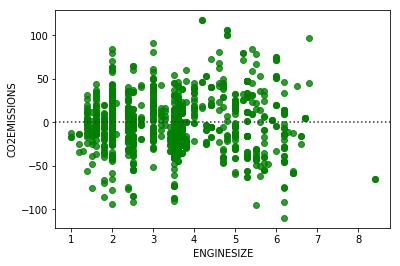

In [27]:
sns.residplot('ENGINESIZE','CO2EMISSIONS',df,color='g')

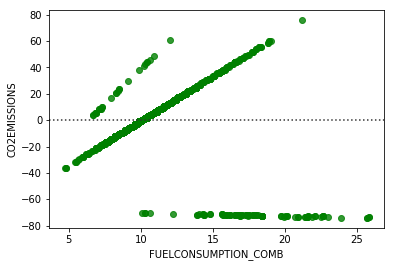

In [28]:
sns.residplot('FUELCONSUMPTION_COMB','CO2EMISSIONS',df,color='g')

#### Since the points are sparsely dispersed , Enginesize is a good canditate for linear regression analysis

### Pearson's correlation (P-Values)

In [29]:
def thresh_pvalue(p_value):
    if p_value <= 0.001:
        print("The p_value is {:f} is less than threshold of 0.001 and is strong fit for regression analysis".format(float(p_value)))
    elif ((p_value > 0.001) & (p_value < 0.05)):
        print("The p_value is {:f} is less than threshold of 0.05 and greater than 0.001 and is moderate fit for regression analysis".format(float(p_value)))
    elif ((p_value > 0.05) & (p_value < 0.1)):
        print("The p_value is {:f} is less than threshold of 0.1  and greater than 0.05 abd is a weak fit for regression analysis".format(float(p_value)))
    else:
        print("The p_value is {:f} is greater than 0.1 and is not a good fit for regression analysis".format(float(p_value)))

In [30]:
pearson_coef, p_value = stats.pearsonr(df['ENGINESIZE'], df['CO2EMISSIONS'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
thresh_pvalue(p_value)

The Pearson Correlation Coefficient is 0.8741543683958123  with a P-value of P = 0.0
The p_value is 0.000000 is less than threshold of 0.001 and is strong fit for regression analysis


In [31]:
pearson_coef, p_value = stats.pearsonr(df['CYLINDERS'], df['CO2EMISSIONS'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
thresh_pvalue(p_value)

The Pearson Correlation Coefficient is 0.8496845920141143  with a P-value of P = 2.7709372039888274e-298
The p_value is 0.000000 is less than threshold of 0.001 and is strong fit for regression analysis


In [32]:
pearson_coef, p_value = stats.pearsonr(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
thresh_pvalue(p_value)

The Pearson Correlation Coefficient is 0.8921285933157566  with a P-value of P = 0.0
The p_value is 0.000000 is less than threshold of 0.001 and is strong fit for regression analysis


#### Hence, all three are good for regression analysis to get correct picture/model for prediction

## Linear Regression Model Prediction

In [33]:
## Split training and test data sets
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [34]:
from sklearn import linear_model

## Instantaniate linear regression constructor
regr = linear_model.LinearRegression()

## Define Predictors
Predictors = ['FUELTYPE_CAT','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']

## Create training dara set
x_train = np.asanyarray(train[Predictors])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

## Fit the model
regr.fit (x_train, y_train)

# The coefficients and intercept
print("The Y-Intercept is",regr.intercept_, " with the slope value of ", regr.coef_)

## Run the prediction

y_hat= regr.predict(test[Predictors])
x_test = np.asanyarray(test[Predictors])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

# Print residual errors
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

print("RMSE: %.2f"
      % np.sqrt(np.mean((y_hat - y_test) ** 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

print("R2-score: %.2f" % r2_score(y_hat , y_test) )

The Y-Intercept is [86.77730309]  with the slope value of  [[-8.36433096 13.54643768  3.16014165 10.80010154]]
Residual sum of squares: 494.31
RMSE: 22.23
Variance score: 0.87
R2-score: 0.86


#### Predicted values for test dataset

In [35]:
final_df = pd.DataFrame(x_test)
final_df.columns = Predictors
final_df['CO2EMISSIONS'] = y_test
final_df['CO2EMISSIONS_PRE'] = y_hat
final_df.head()

,FUELTYPE_CAT,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,CO2EMISSIONS_PRE
0,1.0,3.7,6.0,11.6,267,272.776819
1,1.0,5.9,12.0,15.6,359,364.740238
2,1.0,5.9,12.0,15.6,359,364.740238
3,1.0,2.0,4.0,9.3,214,218.587358
4,1.0,2.0,4.0,10.2,235,228.307450


#### MODEL FITTING 

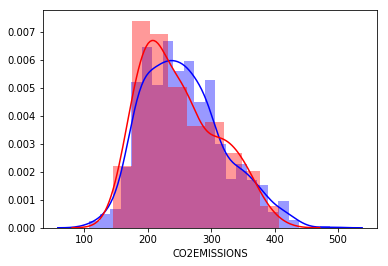

In [36]:
ax2 = sns.distplot(df['CO2EMISSIONS'],color='b',hist=True,label='Actual')
sns.distplot(y_hat,color='r',label='Predicted',hist=True,ax=ax2)

### Typical values for VOLKSWAGEN - Mean, Max and Min CO2 EMISSIONS

In [64]:
#co2data[co2data.MAKE=='VOLKSWAGEN']['ENGINESIZE'].min()
#co2data[co2data.MAKE=='VOLKSWAGEN']['FUELCONSUMPTION_COMB'].min()
#co2data[co2data.MAKE=='VOLKSWAGEN']['CYLINDERS'].min()
#co2data[co2data.MAKE=='VOLKSWAGEN']['FUELTYPE'].min()

In [65]:
print("Mean CO2 Emission:", float(regr.predict([[1,2.21,6,9.11]])))
print("Max CO2 Emission:", float(regr.predict([[1,3.6,6,12.3]])))
print("Min CO2 Emission:", float(regr.predict([[2,1.4,4,5.4]])))

Mean CO2 Emission: 225.70037431974384
Max CO2 Emission: 278.98224661176243
Min CO2 Emission: 159.97476882599642
